In [0]:
import pandas as pd

salary_data = pd.read_csv("/dbfs/FileStore/shared_uploads/bansalv@dnb.com/Salary_Data.csv")

In [0]:
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report ,plot_confusion_matrix
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

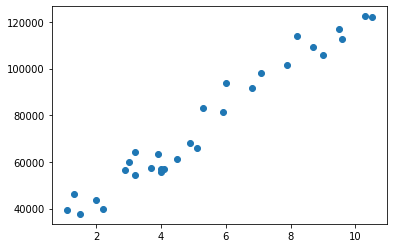

In [0]:
X= salary_data.iloc[:,0]
Y= salary_data.iloc[:,1]
plt.scatter(X,Y)

In [0]:
X = salary_data['YearsExperience'].tolist()
Y= salary_data['Salary'].tolist()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=15)

In [0]:
def initialize_weights(shape):
  
	b = 0
	w = np.zeros_like(X_train[0])
	return w,b

In [0]:
def MSE(y_actual,y_pred):
  """This function calculates the loss of the target columns using log loss function
     y_actual:actual target value
     y_pred:Predicted target value
  """
  loss=np.square(np.subtract(y_actual,y_pred)).mean() 
  return loss

In [0]:
def gradient_wrtb(X,y,w,b,n):
  
  gradient_db =(-2/n)*(y-(np.dot(w.T,X)+b))
  return gradient_db

In [0]:
def gradient_wrtw(X,y,w,b,n):
  
  """This function returna the value of logloss differentiated with respect to the weight
     X:value of independent variables
     y:value of target
     w:weight 
     b:bias
     """
  gradient_dw = (-2/n)*X*(y-(np.dot(w.T, X )+ b))
  return gradient_dw

In [0]:
def prediction(X,w,b):
  """This function returns the Predicted value of y based on the Threshold value
     X:value of independent variables
     w:weight 
     b:bias
  """
  predictions = []
  for i in range(len(X)):
    z = np.dot(w, X[i]) + b
    predictions.append(z)
  return predictions   

In [0]:
def linear_regression(X_train,y_train,X_test,y_test,epochs,LR,batch_size = 1):
    
    ''' In this function, we will implement logistic regression
    X_train:Training Input Dataset
    y_train:Training Output Dataset
    X_test:Testing Input Dataset
    y_test:Testing Output Dataset
    epochs:No of epochs or iterations to fit the best weights
    LR:Learning Rate for Gradient Descent
    batch_size:Batch Size to implement SGD 
    '''
    N = float(len(X_train))
    train_loss = []
    test_loss = []
    w, b = initialize_weights(X_train[0])
    for i in range(epochs):
      
      for i in range(0,len(X_train),batch_size):
          dw = gradient_wrtw(X_train[i],y_train[i],w,b,len(X_train))
          db = gradient_wrtb(X_train[i],y_train[i],w,b,len(X_train))
          w = w - (LR * dw)
          b = b - (LR * db)
      y_pred_train=prediction(X_train,w,b)
      train_loss.append(MSE(y_train,y_pred_train))
      y_pred_test=prediction(X_test,w,b)
      test_loss.append(MSE(y_test,y_pred_test))
    return w,b,train_loss,test_loss
    


In [0]:
N=len(X_train)
epochs=1000000
LR=0.0001
w,b,train_loss,test_loss = linear_regression(X_train,y_train,X_test,y_test,epochs,LR)

In [0]:
w

Out[13]: 9581.699834174362

In [0]:
b

Out[14]: 25138.048184450563

In [0]:
y_pred_train = prediction(X_train,w,b)
y_pred_test = prediction(X_test,w,b)
y_pred=prediction(X,w,b)

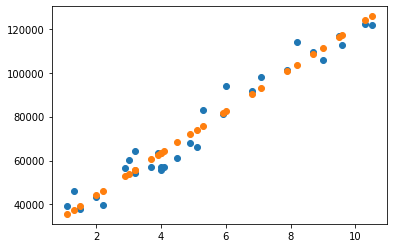

In [0]:
plt.scatter(X,Y)
plt.scatter(X,y_pred)

In [0]:
print('r2_score : %.3f' % r2_score(Y,y_pred))

r2_score : 0.957

In [0]:
#end of notebook
